In [1]:
from sklearn.datasets import make_classification

Generate the dataset

In [2]:
x, y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)

In [3]:
x.shape

(1000, 5)

In [4]:
y.shape

(1000,)

Split the data

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [8]:
x_train.shape, y_train.shape

((800, 5), (800,))

In [9]:
x_test.shape, y_test.shape

((200, 5), (200,))

Build Classification Models

In [11]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [13]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]


In [15]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    scores.append(score)

In [16]:
scores

[0.885,
 0.89,
 0.855,
 0.86,
 0.905,
 0.885,
 0.89,
 0.885,
 0.905,
 0.895,
 0.885,
 0.9,
 0.905,
 0.86]

Analysis of Model Performance

In [17]:
import seaborn as sns

In [18]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.885
1,Linear_SVM,0.890
2,Polynomial_SVM,0.855
3,RBF_SVM,0.860
4,Gaussian_Process,0.905
5,Gradient_Boosting,0.885
6,Decision_Tree,0.890
7,Extra_Trees,0.885
8,Random_Forest,0.905
9,Neural_Net,0.895


Adding colors to the dataframe

In [19]:
cm = sns.light_palette('green', as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.885000
1,Linear_SVM,0.890000
2,Polynomial_SVM,0.855000
3,RBF_SVM,0.860000
4,Gaussian_Process,0.905000
5,Gradient_Boosting,0.885000
6,Decision_Tree,0.890000
7,Extra_Trees,0.885000
8,Random_Forest,0.905000
9,Neural_Net,0.895000


Bar plot of model performance

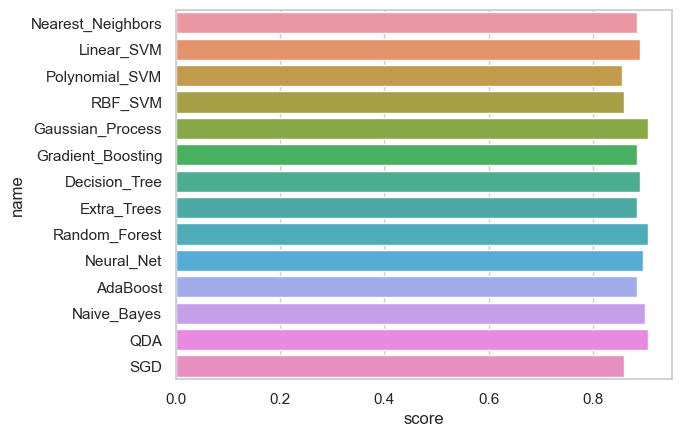

In [20]:
sns.set(style='whitegrid')
ax = sns.barplot(y='name', x='score', data = df)